### Data Visualisation

#### Trend Plots
* Directly plot feature vs time to see relationship.
* Autocorelation
    * Calculates the correlation for a feature with it self, given a particular lagged period
* Lagged plots 
    * Show time series relationship between current feature and past feature  

#### Machine Learning Pre-processing
* Data Normalisation
  * This standardises each numerical data feature to fit between a range of 0-1, allowing for regression and statistical machine learning techniques to be applied
* Time Sorting
    * Sequences the time series data in order to observe trendlines within a year
* Splitting data into Training, Test & Validation
    * By convention, for most research a 70, 20, 10 split is used, hence this will be used for this exploration
* Data Pre-processing
    * This is where the data set is prepared for each specific machine learning methods, be it CNN, LSTM-CNN, or Linear Regression based on the trend patterns observed


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import json

In [2]:
import cv2

In [3]:
config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

In [4]:
# Loading processed Data
df = pd.read_csv('processed_wind_era_le_haute_2017.csv')
df.head()

,Time,mean_2m_air_temperature,minimum_2m_air_temperature,maximum_2m_air_temperature,dewpoint_2m_temperature,total_percipitation,surface_pressure,mean_sea_level_pressure,u_component_of_wind_10m,v_component_of_wind_10m,...,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std
0,2017-01-01 00:00:00+00:00,269.932220,268.215515,271.720673,269.278320,0.000174,98356.281250,102414.289062,1.841093,2.131431,...,6.057066,0.328785,15.643194,15.551302,15.723785,0.045122,623.617223,335.049114,909.467899,140.488750
1,2017-01-02 00:00:00+00:00,272.176300,270.802063,273.620483,271.712891,0.002059,98405.359375,102452.304688,1.904414,-0.041893,...,0.096094,0.013385,9.385312,9.319878,9.441406,0.028056,-3.198663,-6.418038,-1.675208,0.742309
2,2017-01-03 00:00:00+00:00,272.083160,271.294495,272.873596,271.322662,0.000194,98749.265625,102816.750000,2.671353,1.049495,...,0.024983,0.004306,5.133976,5.078819,5.177517,0.020990,0.000000,0.000000,0.000000,0.000000
3,2017-01-04 00:00:00+00:00,273.484558,271.917023,274.898895,272.595581,0.003920,98028.078125,102050.992188,4.853374,0.718936,...,0.349062,0.090763,3.206717,3.153499,3.242588,0.018342,-8.454560,-259.354830,-0.561125,34.181510
4,2017-01-05 00:00:00+00:00,271.901489,267.574341,274.090118,269.158569,0.000468,98922.898438,103005.500000,0.460275,-2.367627,...,0.174497,0.048003,3.035104,2.976997,3.069965,0.019878,-3.401372,-128.633385,0.000000,16.357049


In [5]:
# sample testing for tf saved model objects
test = tf.saved_model.load(os.path.join(os.getcwd(), 'app', 'interim_model'))

In [6]:
CLASS_NAMES = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", 
              "Industrial", "Pasture", "PermanentCrop", "Residential", 
              "River", "SeaLake"]   

In [7]:
loaded = test
print(list(loaded.signatures.keys()))  # ["serving_default"]
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)

['serving_default']
{'dense_1': TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense_1')}


In [8]:
image_path = "D:/University/CEGY3S1/EG3301R/EG3301R/EuroSAT/2750/Residential/Residential_15.jpg"

In [9]:
image_np = cv2.imread(image_path).reshape(-1, 64, 64, 3)
tensor_np = tf.convert_to_tensor(image_np, dtype_hint=float)

In [10]:
#output = infer(tensor_np)
#output

In [11]:
df.shape

(363, 124)

In [12]:
df.keys().values

array(['Time', 'mean_2m_air_temperature', 'minimum_2m_air_temperature',
       'maximum_2m_air_temperature', 'dewpoint_2m_temperature',
       'total_percipitation', 'surface_pressure',
       'mean_sea_level_pressure', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'sat_wind_mag', 'sat_wind_ang',
       'Ba_avg', 'Ba_min', 'Ba_max', 'Ba_std', 'Rt_avg', 'Rt_min',
       'Rt_max', 'Rt_std', 'DCs_avg', 'DCs_min', 'DCs_max', 'DCs_std',
       'Cm_avg', 'Cm_min', 'Cm_max', 'Cm_std', 'P_avg', 'P_min', 'P_max',
       'P_std', 'Q_avg', 'Q_min', 'Q_max', 'Q_std', 'S_avg', 'S_min',
       'S_max', 'S_std', 'Cosphi_avg', 'Cosphi_min', 'Cosphi_max',
       'Cosphi_std', 'Ds_avg', 'Ds_min', 'Ds_max', 'Ds_std', 'Db1t_avg',
       'Db1t_min', 'Db1t_max', 'Db1t_std', 'Db2t_avg', 'Db2t_min',
       'Db2t_max', 'Db2t_std', 'Dst_avg', 'Dst_min', 'Dst_max', 'Dst_std',
       'Gb1t_avg', 'Gb1t_min', 'Gb1t_max', 'Gb1t_std', 'Gb2t_avg',
       'Gb2t_min', 'Gb2t_max', 'Gb2t_std', 'Git_avg', 'G

In [13]:
final = df[['Time', 'mean_2m_air_temperature', 'surface_pressure', 'u_component_of_wind_10m', 'v_component_of_wind_10m', 'sat_wind_mag', 'sat_wind_ang', 'Rt_avg', 'P_avg', 'Ws_avg']].copy()

In [14]:
final.index = pd.to_datetime(final['Time'])
final.head()

,Time,mean_2m_air_temperature,surface_pressure,u_component_of_wind_10m,v_component_of_wind_10m,sat_wind_mag,sat_wind_ang,Rt_avg,P_avg,Ws_avg
Time,,,,,,,,,,
2017-01-01 00:00:00+00:00,2017-01-01 00:00:00+00:00,269.932220,98356.281250,1.841093,2.131431,2.816491,229.180115,9.754913,82.213281,3.532517
2017-01-02 00:00:00+00:00,2017-01-02 00:00:00+00:00,272.176300,98405.359375,1.904414,-0.041893,1.904874,178.739817,8.294549,-2.182361,0.889931
2017-01-03 00:00:00+00:00,2017-01-03 00:00:00+00:00,272.083160,98749.265625,2.671353,1.049495,2.870116,201.448381,7.573056,-3.855399,0.644063
2017-01-04 00:00:00+00:00,2017-01-04 00:00:00+00:00,273.484558,98028.078125,4.853374,0.718936,4.906333,188.426015,7.129032,-5.167511,1.533736
2017-01-05 00:00:00+00:00,2017-01-05 00:00:00+00:00,271.901489,98922.898438,0.460275,-2.367627,2.411951,101.001273,7.428906,-5.342674,0.850017


In [15]:
final.drop(columns=['Time'], inplace=True)
final.head()

,mean_2m_air_temperature,surface_pressure,u_component_of_wind_10m,v_component_of_wind_10m,sat_wind_mag,sat_wind_ang,Rt_avg,P_avg,Ws_avg
Time,,,,,,,,,
2017-01-01 00:00:00+00:00,269.932220,98356.281250,1.841093,2.131431,2.816491,229.180115,9.754913,82.213281,3.532517
2017-01-02 00:00:00+00:00,272.176300,98405.359375,1.904414,-0.041893,1.904874,178.739817,8.294549,-2.182361,0.889931
2017-01-03 00:00:00+00:00,272.083160,98749.265625,2.671353,1.049495,2.870116,201.448381,7.573056,-3.855399,0.644063
2017-01-04 00:00:00+00:00,273.484558,98028.078125,4.853374,0.718936,4.906333,188.426015,7.129032,-5.167511,1.533736
2017-01-05 00:00:00+00:00,271.901489,98922.898438,0.460275,-2.367627,2.411951,101.001273,7.428906,-5.342674,0.850017


In [16]:
# Training and Validation data sets
SPLIT = int(0.8 * final.size)

training_df = final[:SPLIT]
validation_df = final[SPLIT:-1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281B41A2FC8>,
      dtype=object)

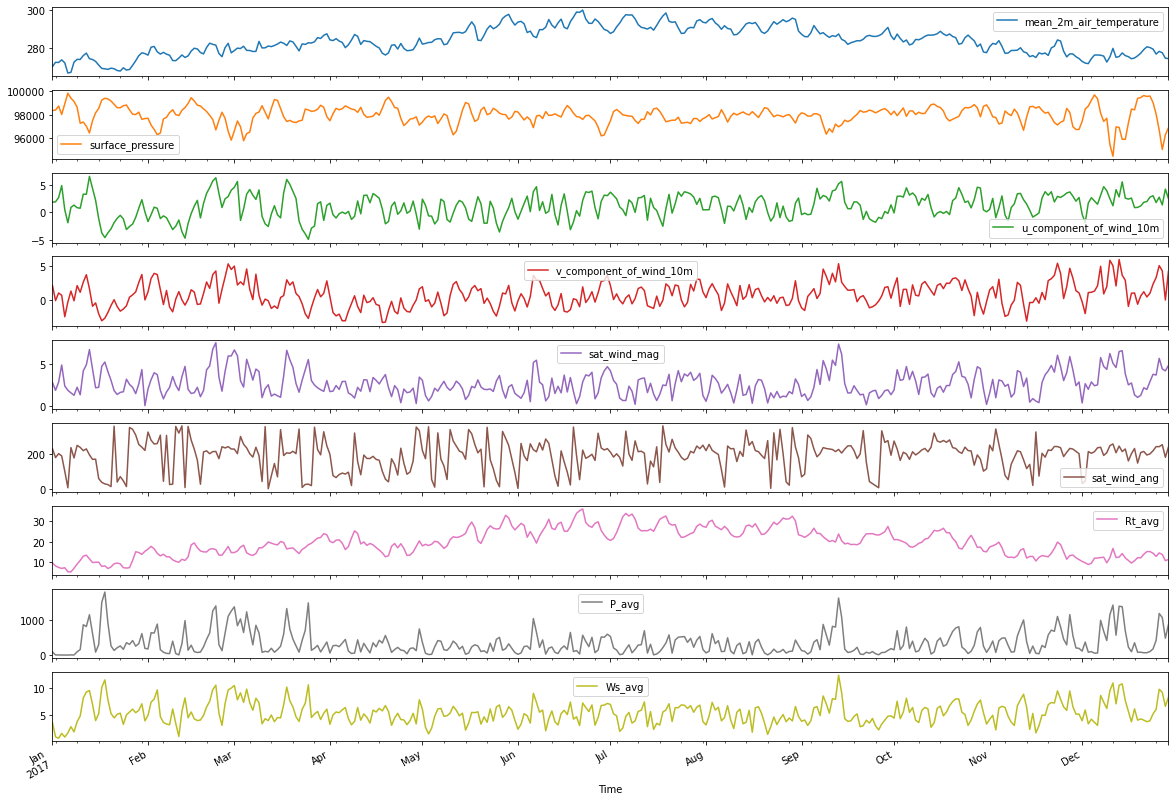

In [17]:
# Plots (Feature vs Time)
final.plot(subplots=True, figsize=(20, 15))

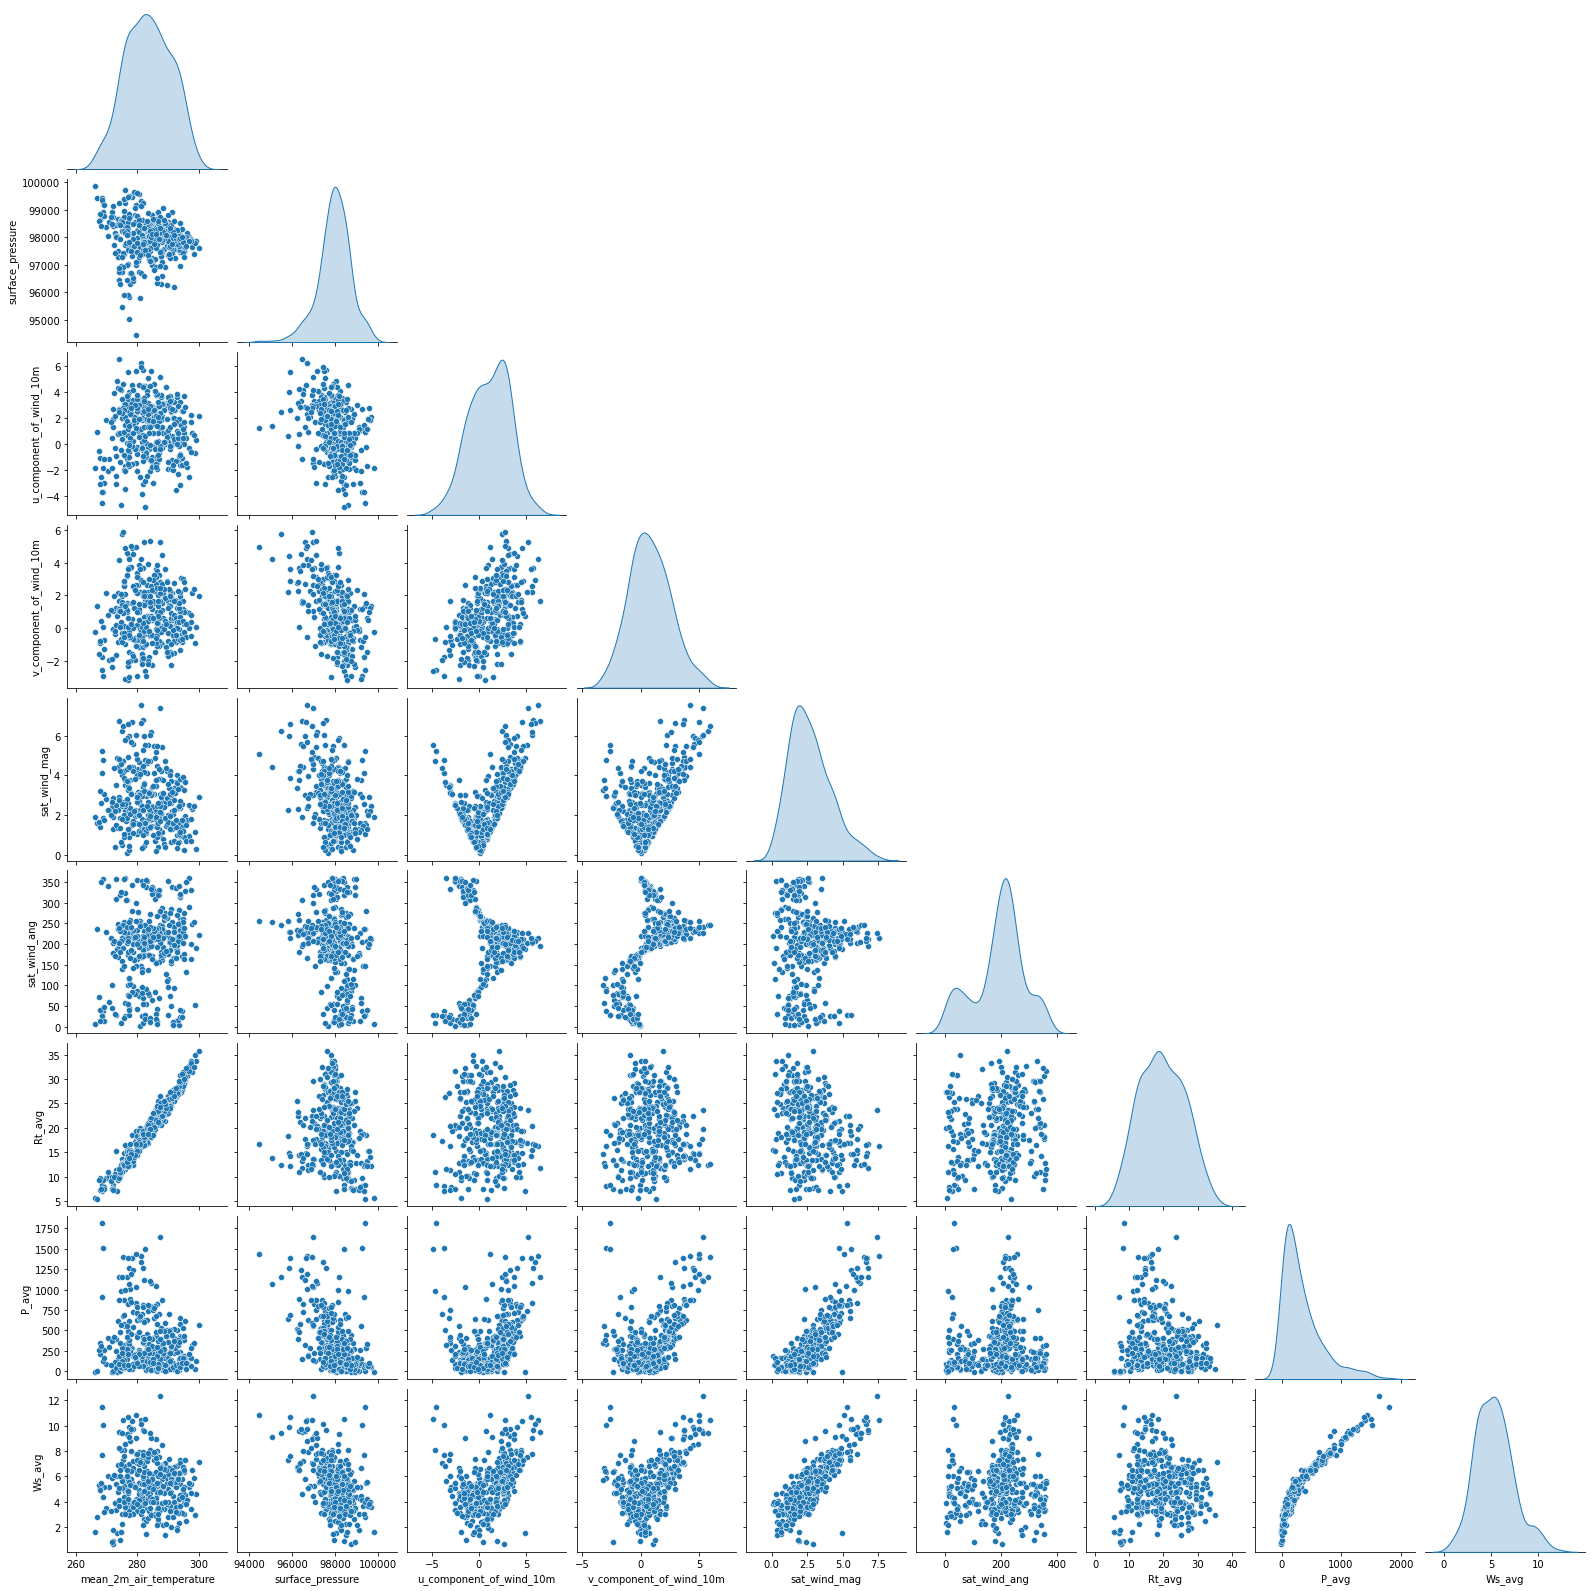

In [18]:
# Pair Plots of Each Feature against every other feature
import seaborn as sns
sns.pairplot(final, diag_kind='kde', corner=True)

Feature Label: mean_2m_air_temperature


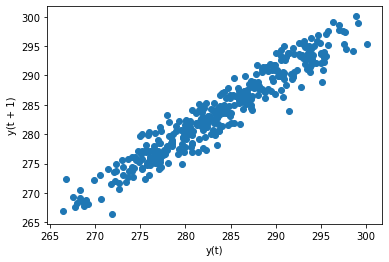

Feature Label: surface_pressure


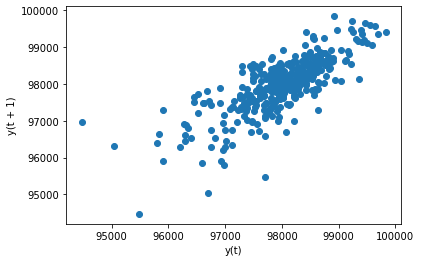

Feature Label: u_component_of_wind_10m


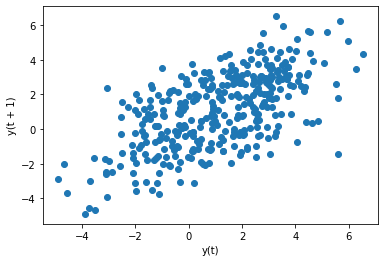

Feature Label: v_component_of_wind_10m


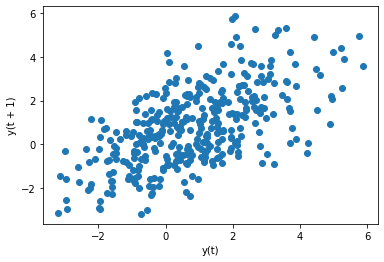

Feature Label: sat_wind_mag


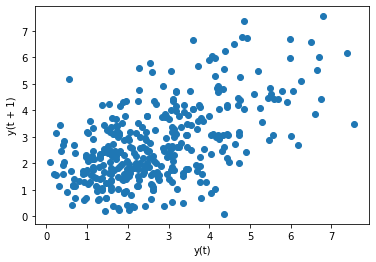

Feature Label: sat_wind_ang


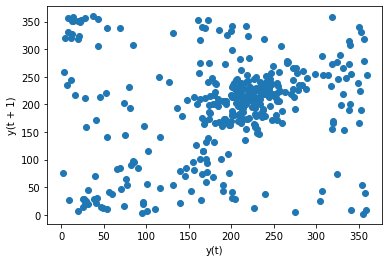

Feature Label: Rt_avg


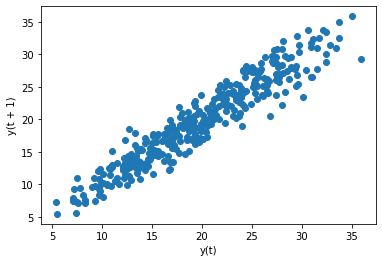

Feature Label: P_avg


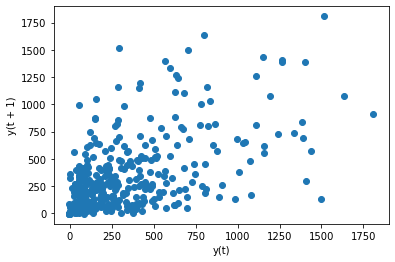

Feature Label: Ws_avg


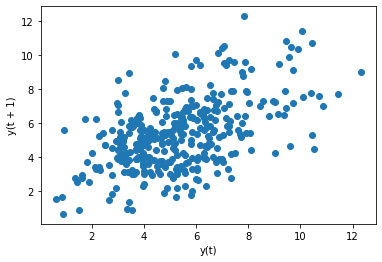

In [19]:
from pandas.plotting import lag_plot
for col in final.keys():
    print('Feature Label: ' + col)
    lag_plot(final[col], lag=1)
    plt.show()

Feature Label: mean_2m_air_temperature


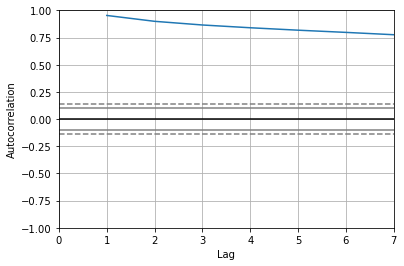

Feature Label: surface_pressure


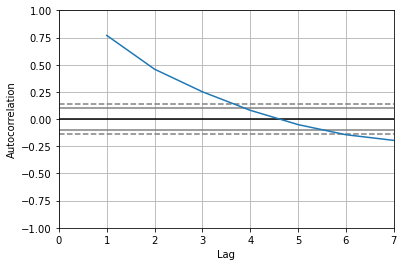

Feature Label: u_component_of_wind_10m


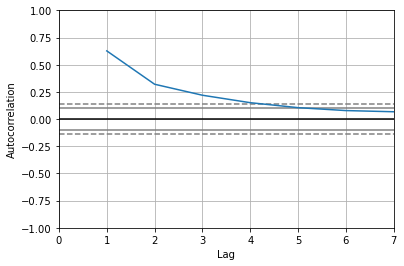

Feature Label: v_component_of_wind_10m


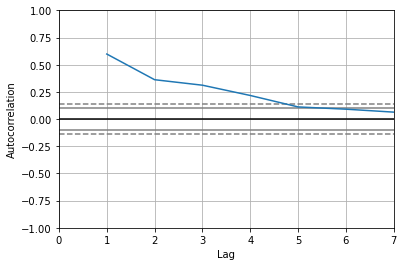

Feature Label: sat_wind_mag


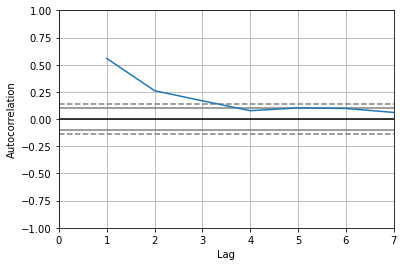

Feature Label: sat_wind_ang


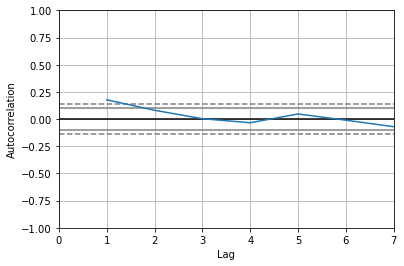

Feature Label: Rt_avg


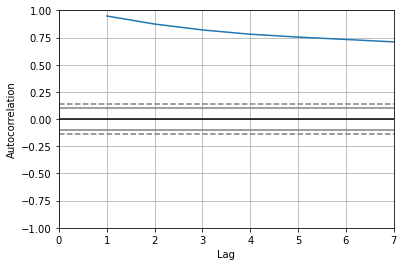

Feature Label: P_avg


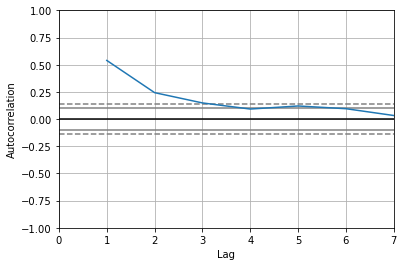

Feature Label: Ws_avg


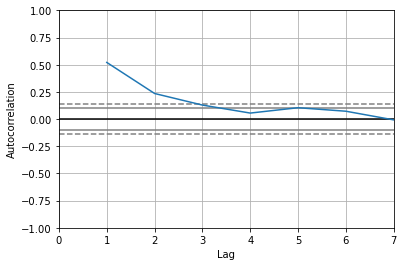

In [20]:
from pandas.plotting import autocorrelation_plot
for col in final.keys():
    print('Feature Label: ' + col)
    autocorrelation_plot(final[col]).set_xlim([0, 7])
    plt.show()

In [21]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
norm_final = min_max_scaler.fit_transform(training_df.drop(columns=['P_avg']))
power_final = min_max_scaler.fit_transform(training_df['P_avg'].values.reshape(-1,1))
norm_final.shape

(363, 8)

In [22]:
# Case 1: Testing with CNN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

BATCH_SIZE = 7
INPUT_SHAPE = norm_final.shape
print(INPUT_SHAPE)

(363, 8)


In [25]:
# Building CNN model

print('Buidling Model')
input_layer = Conv1D(filters=64, kernel_size=1, activation='relu',input_shape=(8, 1))
max_pooling2d = tf.keras.layers.MaxPool1D()
dropout_layer = tf.keras.layers.Dropout(0.2)
dense = tf.keras.layers.Dense(1, activation=tf.nn.softmax)

cnn = Sequential([
    input_layer,
    max_pooling2d,
    dropout_layer,
    dense
])

print('Compiling pretrained model')
base_learning_rate = 1e-3
cnn.compile(loss='mae', optimizer='rmsprop', metrics=['mse'])

Buidling Model
Compiling pretrained model


In [28]:
Xtrain = np.expand_dims(norm_final,axis=-1)
Ytrain = np.expand_dims(power_final,axis=-1)

history = cnn.fit(
  Xtrain, 
  Ytrain, 
  batch_size=BATCH_SIZE, 
  epochs=25, 
  validation_split=0.2)

Train on 290 samples, validate on 73 samples
Epoch 1/25
290/290 [==============================] - 0s 437us/sample - loss: 0.8239 - mse: 0.7104 - val_loss: 0.7470 - val_mse: 0.6019
Epoch 2/25
290/290 [==============================] - 0s 379us/sample - loss: 0.8239 - mse: 0.7104 - val_loss: 0.7470 - val_mse: 0.6019
Epoch 3/25
290/290 [==============================] - 0s 372us/sample - loss: 0.8239 - mse: 0.7104 - val_loss: 0.7470 - val_mse: 0.6019
Epoch 4/25
290/290 [==============================] - 0s 362us/sample - loss: 0.8239 - mse: 0.7104 - val_loss: 0.7470 - val_mse: 0.6019
Epoch 5/25
290/290 [==============================] - 0s 359us/sample - loss: 0.8239 - mse: 0.7104 - val_loss: 0.7470 - val_mse: 0.6019
Epoch 6/25
290/290 [==============================] - 0s 366us/sample - loss: 0.8239 - mse: 0.7104 - val_loss: 0.7470 - val_mse: 0.6019
Epoch 7/25
290/290 [==============================] - 0s 376us/sample - loss: 0.8239 - mse: 0.7104 - val_loss: 0.7470 - val_mse: 0.6019
Epo

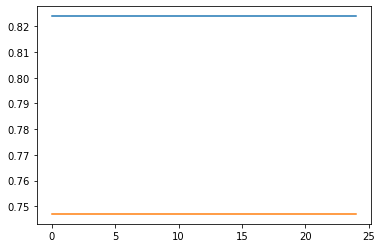

In [29]:
# Plot history: MAE
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.show()